In [ ]:
import numpy as np
import random 
import os
import PIL
import PIL.Image
import tensorflow as tf
# import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
import time
import copy


In [ ]:
df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/data/simple_set/train.csv")

In [ ]:
df

In [ ]:
TRAIN_PCT = 1
TRAIN_CUT = int(len(df) * TRAIN_PCT* 0.9)

In [ ]:
df_train = df
df_validate = df[TRAIN_CUT:]

In [ ]:
print(f"Training size: {len(df_train)}")
print(f"Validate size: {len(df_validate)}")

In [ ]:
training_datagen = ImageDataGenerator(
  rescale = 1./255,
  horizontal_flip=True,
  vertical_flip=True,
  fill_mode='nearest')

In [ ]:
train_generator = training_datagen.flow_from_dataframe(
        dataframe=df_train,
        directory="/Users/rkruse/Git/dfDeepDL/data/",
        x_col="filename",
        y_col="y",
        target_size=(64, 64),
        batch_size=32,
        class_mode='raw')

In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
val_generator = validation_datagen.flow_from_dataframe(
        dataframe=df_validate,
        directory="/Users/rkruse/Git/dfDeepDL/data/",
        x_col="filename",
        y_col="y",
        target_size=(64, 64),
        class_mode='raw')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import time

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='linear', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='linear')
])

# model = tf.keras.Sequential(
#     [
#     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(64, 64, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2), strides=2),

#     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
#     tf.keras.layers.MaxPooling2D((2, 2), strides=2),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(1, activation="linear")
# ]
# )



model.summary()

In [ ]:
# Set seed numpy
random.seed(42)
# Globale
tf.random.set_seed(
    42
)

start_time = time.time()
epoch_steps = 250 # needed for 2.2
validation_steps = len(df_validate)
model.compile(loss = 'mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=15, verbose=1, mode='auto',
        restore_best_weights=True)


# start_time = time.time()
# history = model.fit(train_generator,  
#   verbose = 1,  epochs=25)
history = model.fit(train_generator,  
  verbose = 1, 
  validation_data=val_generator, callbacks=[monitor], epochs=150)
# history = model.fit(train_generator,  
#   verbose = 1, 
#   validation_data=val_generator, epochs=150)  

elapsed_time = time.time() - start_time
print("Elapsed time:", elapsed_time)

In [ ]:
# df_test =  pd.read_csv("C:/Users/rene-/Git/dfDeepDL/data/simple_set/test.csv")
df_test =  df_train


test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = validation_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory="/Users/rkruse/Git/dfDeepDL/data/",
        x_col="filename",
        batch_size=1,
        shuffle=False,
        target_size=(64, 64),
        class_mode=None)

In [ ]:
test_generator.reset()
pred = model.predict(test_generator)

In [ ]:
np.unique(pred)

In [ ]:
pred[[0,100, 200, 300, 400, 500, 600, 700, 800]]

____

# Berechnung der DFs

In [70]:
df = pd.read_csv("/Users/rkruse/Git/dfDeepDL/data/train_small.csv")
TRAIN_PCT = 1
TRAIN_CUT = int(len(df) * TRAIN_PCT* 0.9)
df_train = df
df_validate = df[TRAIN_CUT:]

In [71]:
training_datagen = ImageDataGenerator(
  rescale = 1./255,
  horizontal_flip=True,
  vertical_flip=True,
  fill_mode='nearest')
train_generator = training_datagen.flow_from_dataframe(
        dataframe=df_train,
        directory="/Users/rkruse/Git/dfDeepDL/data/",
        x_col="filename",
        y_col="y",
        target_size=(64, 64),
        batch_size=32,
        class_mode='raw')
validation_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = validation_datagen.flow_from_dataframe(
        dataframe=df_validate,
        directory="/Users/rkruse/Git/dfDeepDL/data/",
        x_col="filename",
        y_col="y",
        target_size=(64, 64),
        class_mode='raw')

Found 90 validated image filenames.
Found 9 validated image filenames.


In [72]:
opt = tf.keras.optimizers.Adam()

## Setting the seed

In [73]:
random.seed(42)
tf.random.set_seed(42)

## grundlegendes modell

In [74]:
model0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='linear', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='linear')
])

In [75]:
model0.summary()

Model: "sequential_364"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_365 (Conv2D)          (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_365 (MaxPoolin (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_364 (Flatten)        (None, 61504)             0         
_________________________________________________________________
dense_365 (Dense)            (None, 1)                 61505     
Total params: 63,297
Trainable params: 63,297
Non-trainable params: 0
_________________________________________________________________


## fitten des modells

In [76]:
# Set seed numpy
random.seed(42)
# Globale
tf.random.set_seed(
    42
)

epoch_steps = 250 # needed for 2.2
validation_steps = len(df_validate)
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=20, verbose=1, mode='auto',
        restore_best_weights=True)
model0.compile(loss = 'mean_squared_error', optimizer='adam')


In [77]:
# hist0 = model0.fit(train_generator,  
#   verbose = 1, 
#   validation_data=val_generator, callbacks=[monitor], epochs=150)
hist0 = model0.fit(train_generator,  
  verbose = 0, 
  validation_data=val_generator, epochs=200)

2022-04-01 00:46:54.159849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:46:54.555942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [78]:
# df_test =  pd.read_csv("C:/Users/rene-/Git/dfDeepDL/data/simple_set/test.csv")
df_test =  df_train

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = validation_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory="/Users/rkruse/Git/dfDeepDL/data/",
        x_col="filename",
        batch_size=1,
        shuffle=False,
        target_size=(64, 64),
        class_mode=None)

Found 90 validated image filenames.


In [79]:
yhat = model0.predict(test_generator)

2022-04-01 00:47:36.204580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## Finite differences

In [80]:
h = 1e-5

## forward diff

gewichte_m1 = [ ]
y_iter = []
gewichte_m2 = [ ]
fits = []

In [87]:
gewichte_m1 = [ ]
y_iter = []
gewichte_m2 = [ ]
fits = []

In [88]:
for i in range(90):
    temp_df = copy.deepcopy(df)
    temp_df["y"].loc[i] += h
    random.seed(42)
    tf.random.set_seed(42)
    df_train = temp_df
    df_validate = temp_df[TRAIN_CUT:]
    training_datagen = ImageDataGenerator(
      rescale = 1./255,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')
    train_generator = training_datagen.flow_from_dataframe(
        dataframe=df_train,
        directory="/Users/rkruse/Git/dfDeepDL/data/",
        x_col="filename",
        y_col="y",
        target_size=(64, 64),
        batch_size=32,
        class_mode='raw')
    validation_datagen = ImageDataGenerator(rescale = 1./255)
    val_generator = validation_datagen.flow_from_dataframe(
        dataframe=df_validate,
        directory="/Users/rkruse/Git/dfDeepDL/data/",
        x_col="filename",
        y_col="y",
        target_size=(64, 64),
        class_mode='raw')
    model1 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='linear', input_shape=(64, 64, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='linear')
    ])
    model1.compile(loss = 'mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
          patience=15, verbose=1, mode='auto',
          restore_best_weights=True)

    history = model1.fit(train_generator,  
      verbose = 0, 
      validation_data=val_generator,  epochs=200)
    df_test =  df_train

    test_datagen = ImageDataGenerator(rescale = 1./255)

    test_generator = validation_datagen.flow_from_dataframe(
            dataframe=df_test,
            directory="/Users/rkruse/Git/dfDeepDL/data/",
            x_col="filename",
            batch_size=1,
            shuffle=False,
            target_size=(64, 64),
            class_mode=None)
    temp_pred = model1.predict(test_generator)
    fits.append(temp_pred[i])

Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:50:59.614146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:51:00.021527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:51:19.311946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:51:19.609082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:51:19.873705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 00:51:38.741942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:51:39.107944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:51:39.370654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:51:58.098751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:51:58.379249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:51:58.637112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:52:17.396075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:52:17.685656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:52:17.977807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:52:37.115146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:52:37.414120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:52:37.738073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:52:56.529022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:52:56.826930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:52:57.118839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:53:15.945099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:53:16.223073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:53:16.521572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:53:34.909885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:53:35.923416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:53:36.227281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 00:53:54.839354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:53:55.255388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:53:55.571904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:54:14.344769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:54:14.644291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:54:14.955485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:54:33.587054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:54:33.879317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:54:34.148609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:54:52.847119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:54:53.160903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:54:53.474676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:55:12.291740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:55:12.593153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:55:12.860934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:55:31.744761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:55:32.041808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:55:32.334117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:55:51.238472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:55:51.524150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:55:51.805801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:56:10.761476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:56:11.047937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:56:11.320435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:56:30.082040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:56:30.368367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:56:30.676953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:56:49.986873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:56:50.296196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:56:50.638541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 00:57:10.000945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:57:10.361805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:57:10.668023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:57:29.199683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:57:29.490386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:57:29.774105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:57:48.255202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:57:48.544694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:57:48.841940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:58:07.402145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:58:07.692331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:58:07.982562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:58:26.533011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:58:26.816752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:58:27.114304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:58:45.776143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:58:46.064678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:58:46.345904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:59:04.873370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:59:05.158875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:59:05.466569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:59:24.293551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:59:24.601692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:59:24.979515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 00:59:44.829961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 00:59:45.325193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 00:59:45.688084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:00:05.182195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:00:05.614441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:00:06.649675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:00:25.814114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:00:26.261084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:00:26.590978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:00:45.296232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:00:45.591809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:00:45.896876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:01:05.217901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:01:05.667738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:01:05.995708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:01:25.727823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:01:26.083979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:01:26.453034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:01:45.995197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:01:46.348320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:01:46.656575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:02:06.064312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:02:06.410145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:02:06.740911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:02:25.576884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:02:25.892610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:02:26.207932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:02:46.185395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:02:46.626192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:02:46.955831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:03:05.764487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:03:06.074831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:03:06.401722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:03:25.095304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:03:25.398455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:03:25.704969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:03:44.651947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:03:45.129350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:03:45.511989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:04:04.718502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:04:05.020000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:04:05.326409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:04:24.280211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:04:24.574856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:04:24.883459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:04:43.795451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:04:44.089291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:04:44.401736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:05:03.569549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:05:03.857048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:05:04.155452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:05:23.277101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:05:23.617364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:05:23.914555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:05:43.046198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:05:43.346285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:05:43.635670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:06:02.547968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:06:02.844105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:06:03.142070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:06:21.699042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:06:21.991290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:06:22.293912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:06:40.960895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:06:41.274619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:06:41.578731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:07:00.787998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:07:01.814070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:07:02.178033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:07:21.276204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:07:21.634583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:07:21.956816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:07:40.864684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:07:41.154007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:07:41.426413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:08:00.913687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:08:01.350065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:08:01.651594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:08:21.512612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:08:21.866115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:08:22.232547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:08:41.326588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:08:41.613031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:08:41.914022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:09:01.323917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:09:01.625040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:09:01.937473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:09:21.373211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:09:21.701401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:09:22.015853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:09:41.313732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:09:41.648309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:09:41.963407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:10:01.245796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:10:01.561674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:10:01.866396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:10:20.477898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:10:20.766697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:10:21.092890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:10:39.676451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:10:39.962997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:10:40.258675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:10:58.958977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:10:59.248408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:10:59.551921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:11:18.211379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:11:18.499569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:11:18.797122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:11:37.257252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:11:37.540339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:11:37.828264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:11:56.287184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:11:56.574694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:11:56.876806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:12:15.464998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:12:15.749879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:12:16.044700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:12:34.747700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:12:35.030342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:12:35.326436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:12:53.985852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:12:54.268625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:12:54.558861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:13:13.137824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:13:13.415099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:13:13.706488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:13:31.984304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:13:32.261474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:13:32.560813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:13:51.006032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:13:51.292267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:13:51.585699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:14:10.601756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:14:10.886910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:14:11.176651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:14:29.800204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:14:30.083260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:14:30.372936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:14:48.939346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:14:49.226255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:14:49.528708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:15:08.126040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:15:08.406579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:15:08.700362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:15:27.383813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:15:27.667783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:15:27.965715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:15:46.636966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:15:46.920087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:15:47.219651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:16:06.111971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:16:06.392831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:16:06.663552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:16:25.742644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:16:26.029414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:16:26.334372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:16:44.933436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:16:45.218207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:16:45.512485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:17:04.107345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:17:04.388708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:17:04.691883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:17:23.291998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:17:23.568781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:17:23.857807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:17:42.348813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:17:42.627418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:17:42.914068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:18:01.567329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:18:01.847423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:18:02.148299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:18:20.751792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:18:21.029796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:18:21.331422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:18:39.878406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:18:40.158499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:18:40.448610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:18:59.024785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:18:59.300653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:18:59.603816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:19:18.306038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:19:18.590129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:19:18.888380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:19:37.432632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:19:37.717641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:19:38.012524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.
Found 90 validated image filenames.
Found 9 validated image filenames.


2022-04-01 01:19:56.509604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:19:56.789341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-04-01 01:19:57.077312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Found 90 validated image filenames.


2022-04-01 01:20:15.364450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [92]:
fits_f = copy.deepcopy( np.array(fits))  # sicherheitshalber richtiges format.

In [93]:
np.sum((fits_f - yhat) / h)

13016.816

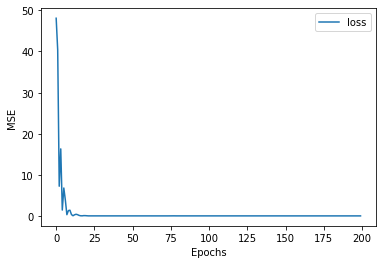

In [91]:
import matplotlib.pyplot as plt

plt.plot(hist0.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [ ]:
gewichte_m1 = [ ]
y_iter = []
gewichte_m2 = [ ]
fits = []

In [ ]:
for i in range(90):
    temp_df = copy.deepcopy(df)
    temp_df["y"][i] -= h
    random.seed(42)
    tf.random.set_seed(42)
    df_train = temp_df
    df_validate = temp_df[TRAIN_CUT:]
    training_datagen = ImageDataGenerator(
      rescale = 1./255,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')
    train_generator = training_datagen.flow_from_dataframe(
        dataframe=df_train,
        directory="/Users/rkruse/Git/dfDeepDL/data/",
        x_col="filename",
        y_col="y",
        target_size=(64, 64),
        batch_size=32,
        class_mode='raw')
    validation_datagen = ImageDataGenerator(rescale = 1./255)
    val_generator = validation_datagen.flow_from_dataframe(
        dataframe=df_validate,
        directory="/Users/rkruse/Git/dfDeepDL/data/",
        x_col="filename",
        y_col="y",
        target_size=(64, 64),
        class_mode='raw')
    model1 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='linear', input_shape=(64, 64, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='linear')
    ])
    model1.compile(loss = 'mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
          patience=15, verbose=1, mode='auto',
          restore_best_weights=True)

    history = model1.fit(train_generator,  
      verbose = 0, 
      validation_data=val_generator, epochs=200)
    df_test =  df_train

    test_datagen = ImageDataGenerator(rescale = 1./255)

    test_generator = validation_datagen.flow_from_dataframe(
            dataframe=df_test,
            directory="/Users/rkruse/Git/dfDeepDL/data/",
            x_col="filename",
            batch_size=1,
            shuffle=False,
            target_size=(64, 64),
            class_mode=None)
    temp_pred = model1.predict(test_generator)
    fits.append(temp_pred[i])

In [ ]:
fits_b = copy.deepcopy( np.array(fits))  # sicherheitshalber richtiges format.

In [ ]:
np.sum((yhat - fits_b) / h)

In [ ]:
np.sum((fits_f - fits_b) / (2 * h))